In [ ]:
#Run it only if you encounter tensorflow related issues
!pip install --upgrade --force-reinstall jax jaxlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing insta

In [ ]:

!pip install scikit-learn tensorflow numpy Bio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
#1---Data Extraction
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from Bio import Entrez, SeqIO
from sklearn.model_selection import train_test_split
from collections import defaultdict

# Set your email for NCBI Entrez
Entrez.email = "praneethaluguri@gmail.com"  # Change this to your email

# List of viruses with required number of records
virus_list = [    ("Middle East respiratory syndrome-related coronavirus",1700), ("Human coronavirus NL63", 1300),("Human coronavirus HKU1", 900) ,("SARS-CoV-2", 1000),(" SARS-CoV",86),("HCoV-OC43",1957),("HCoV-229E",1000) ]

# Label mapping
virus_to_label = {virus[0]: idx for idx, virus in enumerate(virus_list)}

# Function to fetch NCBI accession numbers
def fetch_accession_numbers(virus_name, num_records):
    try:
        search_query = f'"{virus_name}"[Organism] AND "Homo sapiens"[Host] AND complete genome[Title]'
        handle = Entrez.esearch(db="nucleotide", term=search_query, retmax=num_records)
        record = Entrez.read(handle)
        handle.close()

        accession_numbers = record["IdList"]
        print(f"Fetched {len(accession_numbers)} records for {virus_name}")
        return accession_numbers

    except Exception as e:
        print(f"Error fetching data for {virus_name}: {e}")
        time.sleep(5)

# Function to fetch genome sequences using accession numbers
def fetch_genome_sequence(accession_number):
    try:
        handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")
        record = SeqIO.read(handle, "fasta")
        handle.close()
        return str(record.seq)
    except Exception as e:
        print(f"Error fetching sequence for {accession_number}: {e}")
        time.sleep(5)

# Fetch data
accession_dict = defaultdict(list)
for virus_name, num_records in virus_list:
    accessions = fetch_accession_numbers(virus_name, num_records)
    accession_dict[virus_name] = accessions

# Convert DNA sequences to numerical encoding
def encode_sequence(sequence):
    encoding_map = {"A": 1, "C": 2, "G": -1, "T": -2}
    return [encoding_map.get(base, 0) for base in sequence]  # Default 0 for unknown bases

# Fetch sequences & labels
sequences = []
labels = []
for virus_name, accession_numbers in accession_dict.items():
      for acc in accession_numbers:
        seq = fetch_genome_sequence(acc)
        if seq:
            sequences.append(encode_sequence(seq))
            labels.append(virus_to_label[virus_name])
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length, padding="post", value=0)
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Padding sequences

# Define model


Fetched 271 records for Middle East respiratory syndrome-related coronavirus
Fetched 143 records for Human coronavirus NL63
Fetched 56 records for Human coronavirus HKU1
Fetched 1000 records for SARS-CoV-2
Fetched 2 records for  SARS-CoV
Fetched 318 records for HCoV-OC43
Fetched 110 records for HCoV-229E


In [ ]:
##2
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
# Save data for Code2
# np.savez('/content/drive/MyDrive/dataset.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,max_length=max_length,lenVirusList=len(virus_list))

#print("✅ Data saved successfully! Ready for Code2.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
###3
data = np.load('/content/drive/MyDrive/dataset.npz')

X_train, y_train = data['X_train'], data['y_train']
X_test, y_test = data['X_test'], data['y_test']
max_length,lenVirusList=data['max_length'],data['lenVirusList']
print("✅ Data restored successfully!")

✅ Data restored successfully!


In [ ]:
print(max_length)

31104


In [12]:
#####4
max_length = X_train.shape[1]
# print(max_length)
import numpy as np
lenVirusList = len(np.unique(y_train))


In [ ]:
#####5---Model
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras import mixed_precision

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Enable mixed precision for T4 GPU
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# 🔸 Ensure max_length and lenVirusList are already defined from loaded data
# For example:
# max_length = data['max_length'].item()
# lenVirusList = data['lenVirusList'].item()

# 🔸 Define your BiLSTM model (CuDNN acceleration is auto-handled on GPU)
model = Sequential([
    Embedding(input_dim=5, output_dim=128, input_length=max_length),

    Bidirectional(LSTM(128, return_sequences=True)),  # Automatically uses CuDNN
    Dropout(0.3),

    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(lenVirusList, activation='softmax', dtype='float32')  # Output stays float32
])

# Compile model with XLA (JIT) acceleration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], jit_compile=True)

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.save('/content/drive/MyDrive/Colab Notebooks/BI/biLSTM_virus_classifier_model.h5')
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.4949 - loss: 1.5896 - val_accuracy: 0.5296 - val_loss: 1.2459
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.5546 - loss: 1.2559 - val_accuracy: 0.6711 - val_loss: 0.9667
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.6393 - loss: 1.0102 - val_accuracy: 0.7237 - val_loss: 0.8039
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.7883 - loss: 0.6536 - val_accuracy: 0.8618 - val_loss: 0.3969
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.8536 - loss: 0.4656 - val_accuracy: 0.8651 - val_loss: 0.4556
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.8756 - loss: 0.4059 - val_accuracy: 0.9145 - val_loss: 0.2982
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.9262 - loss: 0.2842 - val_accuracy: 0.9638 - val_loss: 0.1886
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.9146 - loss: 0.2986 - val_accuracy: 0.9572 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9839 - loss: 0.1176
✅ Test Accuracy: 97.63%


In [18]:
###6
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/BI/biLSTM_virus_classifier_model.h5')

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


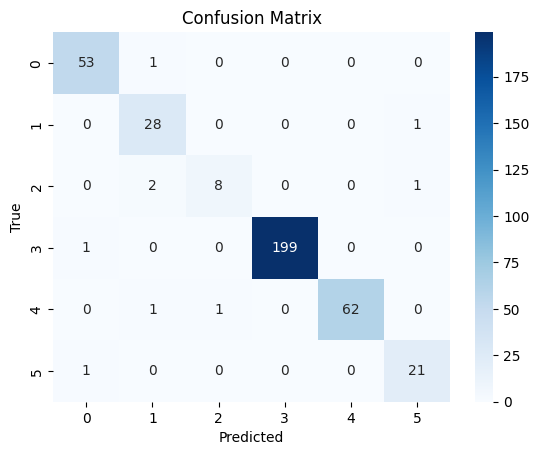

                                                      precision    recall  f1-score   support

Middle East respiratory syndrome-related coronavirus       0.96      0.98      0.97        54
                              Human coronavirus NL63       0.88      0.97      0.92        29
                              Human coronavirus HKU1       0.89      0.73      0.80        11
                                          SARS-CoV-2       1.00      0.99      1.00       200
                                           HCoV-OC43       1.00      0.97      0.98        64
                                           HCoV-229E       0.91      0.95      0.93        22

                                            accuracy                           0.98       380
                                           macro avg       0.94      0.93      0.93       380
                                        weighted avg       0.98      0.98      0.98       380



In [ ]:
####7---Metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

virus_list = [    ("Middle East respiratory syndrome-related coronavirus",1700), ("Human coronavirus NL63", 1300),("Human coronavirus HKU1", 900) ,("SARS-CoV-2", 1000),("HCoV-OC43",1957),("HCoV-229E",1000) ]

# Label mapping (" SARS-CoV",86),
virus_to_label = {virus[0]: idx for idx, virus in enumerate(virus_list)}
# Classification report (precision, recall, f1)
print(classification_report(y_test, y_pred_classes, target_names=virus_to_label.keys()))


In [ ]:
######8.1----Mutation Detection Without Reference Genome (Pattern-Based Inference)

from collections import Counter
import numpy as np

# Predict classes for test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

X_array = np.array(X_test)
classwise_mutations = {}

# For each predicted class
for virus_class in np.unique(y_pred_classes):
    # Get indices of sequences predicted as this class
    class_indices = np.where(y_pred_classes == virus_class)[0]
    class_seqs = X_array[class_indices]

    position_mutations = []

    # Analyze column-wise (base position)
    for i in range(class_seqs.shape[1]):
        col = class_seqs[:, i]
        freqs = Counter(col)
        if len(freqs) > 1 and max(freqs.values()) < 0.6 * len(col):
            position_mutations.append((i, dict(freqs)))

    classwise_mutations[virus_class] = position_mutations

# Show top 5 mutation-prone positions for each predicted class
for cls, mutations in classwise_mutations.items():
    print(f"\n🔹 Virus Class {cls}: Top Mutation Positions")
    for pos, freqs in mutations[:5]:
        print(f"  Position {pos}: {freqs}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1394s 115s/step

🔹 Virus Class 0: Top Mutation Positions
  Position 0: {np.int32(-2): 6, np.int32(2): 8, np.int32(1): 19, np.int32(-1): 22}
  Position 1: {np.int32(-2): 23, np.int32(1): 24, np.int32(2): 3, np.int32(-1): 5}
  Position 4: {np.int32(2): 21, np.int32(-1): 9, np.int32(-2): 23, np.int32(1): 2}
  Position 6: {np.int32(1): 26, np.int32(-1): 3, np.int32(2): 19, np.int32(-2): 7}
  Position 7: {np.int32(-2): 27, np.int32(1): 3, np.int32(-1): 22, np.int32(2): 3}

🔹 Virus Class 1: Top Mutation Positions
  Position 0: {np.int32(2): 9, np.int32(-2): 7, np.int32(1): 11, np.int32(-1): 5}
  Position 1: {np.int32(-2): 12, np.int32(1): 13, np.int32(2): 6, np.int32(-1): 1}
  Position 3: {np.int32(1): 8, np.int32(-2): 19, np.int32(2): 4, np.int32(-1): 1}
  Position 4: {np.int32(1): 12, np.int32(2): 2, np.int32(-1): 1, np.int32(-2): 17}
  Position 5: {np.int32(1): 12, np.int32(2): 3, np.int32(-2): 11, np.int32(-1): 6}

🔹 Virus Class 2: Top Mutation Positions
  Posi

In [22]:
######8.12----Mutation Detection Without Reference Genome (Pattern-Based Inference)

from collections import Counter
import numpy as np

# Predict classes for test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

X_array = np.array(X_test)
classwise_mutations = {}
encoding_map = {"A": 1, "C": 2, "G": -1, "T": -2}

# Reverse the encoding_map to decode base values
decode_map = {v: k for k, v in encoding_map.items()}
# For each predicted class
for virus_class in np.unique(y_pred_classes):
    # Get indices of sequences predicted as this class
    class_indices = np.where(y_pred_classes == virus_class)[0]
    class_seqs = X_array[class_indices]

    position_mutations = []

    # Analyze column-wise (base position)
    for i in range(class_seqs.shape[1]):
        col = class_seqs[:, i]
        freqs = Counter(col)
        if len(freqs) > 1 and max(freqs.values()) < 0.4 * len(col):
            decoded_freqs = {decode_map.get(int(k), 'N'): v for k, v in freqs.items()}
            position_mutations.append((i, decoded_freqs))
            # position_mutations.append((i, dict(freqs)))
    classwise_mutations[virus_class] = position_mutations

# Show top 5 mutation-prone positions for each predicted class
for cls, mutations in classwise_mutations.items():
    print(f"\n🔹 Virus Class {cls}: Top Mutation Positions")
    for pos, freqs in mutations[:5]:
        print(f"  Position {pos}: {freqs}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step

🔹 Virus Class 0: Top Mutation Positions
  Position 48: {'G': 21, 'A': 19, 'T': 13, 'C': 2}
  Position 76: {'C': 4, 'T': 12, 'G': 18, 'A': 21}
  Position 79: {'A': 3, 'T': 13, 'G': 18, 'C': 21}
  Position 117: {'G': 9, 'T': 19, 'C': 6, 'A': 21}
  Position 119: {'C': 9, 'A': 18, 'G': 7, 'T': 21}

🔹 Virus Class 1: Top Mutation Positions
  Position 0: {'C': 9, 'T': 7, 'A': 11, 'G': 5}
  Position 5: {'A': 12, 'C': 3, 'T': 11, 'G': 6}
  Position 7: {'A': 10, 'T': 12, 'C': 4, 'G': 6}
  Position 18: {'C': 11, 'G': 5, 'T': 12, 'A': 4}
  Position 27: {'G': 6, 'C': 11, 'A': 7, 'T': 8}

🔹 Virus Class 2: Top Mutation Positions
  Position 7: {'G': 2, 'T': 2, 'C': 3, 'A': 2}
  Position 15: {'C': 3, 'G': 3, 'T': 1, 'A': 2}
  Position 16: {'G': 2, 'T': 2, 'A': 3, 'C': 2}
  Position 23: {'A': 2, 'C': 3, 'G': 3, 'T': 1}
  Position 57: {'A': 3, 'G': 3, 'T': 2, 'C': 1}

🔹 Virus Class 3: Top Mutation Positions
  Position 2: {'C': 54, 'N': 25, 'A': 76, 'T': 35, 'G': 9}

In [ ]:
print((class_seqs.shape[1]))

31104


In [13]:
#######5.2
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

# Define input layer
inputs = Input(shape=(X_train.shape[1],), dtype='int32')

# Embedding and LSTM layers
x = Embedding(input_dim=5, output_dim=128)(inputs)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(64))(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Build the model
model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], jit_compile=True)
model2.save('/content/drive/MyDrive/Colab Notebooks/BI/biLSTM_virus_classifier_model_2.h5')

model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 31104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 31104, 128)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 31104, 256)     │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 31104, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,871 (1.67 MB)

 Trainable params: 436,871 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#####9-------Explainability: Why the Model Predicts a Specific Virus

# Get the embedding layer
embedding_layer = model2.get_layer(index=1)  # Embedding is typically 1st after Input

# Create embedding model to extract embedding output
embed_model = tf.keras.Model(inputs=model2.input, outputs=embedding_layer.output)

# Get the embedded input (float32)
embedded_input = embed_model(input_sample)

# Enable gradient tracking on embeddings
with tf.GradientTape() as tape:
    tape.watch(embedded_input)
    x = embedded_input
    for layer in model2.layers[2:]:  # Skip input & embedding layers
        x = layer(x)
    predictions = x
    predicted_class = tf.argmax(predictions[0])
    selected_output = predictions[:, predicted_class]

# Compute gradients w.r.t. embeddings
grads = tape.gradient(selected_output, embedded_input)
grads_val = grads.numpy()

# Get most influential positions
influential_positions = np.argsort(np.abs(grads_val).sum(axis=2)[0])[::-1][:10]
print("Top influential positions:", influential_positions)




Top influential positions: [31103 31102     0 31101     1 31100     2     3 31099     4]
